In [1]:
# Dimensionality Reduction
# Setup

# First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals



In [2]:
# Common imports
import numpy as np
import os



In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)




In [4]:
# To plot pretty figures
#get_ipython().magic('matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)




In [6]:
# # Projection methods
# Build 3D dataset:

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print("")
print("a random data set in 3D space :-")
print(X)
print("")




a random data set in 3D space :-
[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]
 [ 1.11816122  0.32508721  0.31710572]
 [-1.02258878 -0.64384064 -0.13368695]
 [ 0.67351984 -0.27342519 -0.00787835]
 [ 1.01619558  0.51546608  0.46783297]
 [ 0.54957723  0.67728016  0.2340159 ]
 [-0.98960443  0.00886617 -0.12152034]
 [ 1.13248106  0.28229967  0.06972972]
 [-0.99337712 -0.26832824 -0.15761101]
 [-0.94763679 -0.4995849  -0.13927911]
 [ 1.10095709  0.1706481   0.09790432]
 [-0.34604591  0.45334414  0.06433843]
 [ 0.69102621 -0.27337761 -0.05926516]
 [ 0.68302902  0.70421846  0.24642318]
 [ 0.8774031  -0.16775101 -0.02162333]
 [-1.06090127 -0.48213721 -0.38573526]
 [ 0.52336644  0.66585845  0.39019099]
 [-0.94419403 -0.61502157 -0.47610118]
 [-0.9716288   0.00742468 -0.18764369]
 [-1.10560661 -0.31903307 -0.17189644]
 [ 1.1748694   0.15718214  0.2

In [7]:
# ## PCA using Scikit-Learn

# With Scikit-Learn, PCA is really trivial. It even takes care of mean centering for you:

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

X2D[:5]

#np.allclose(X2D, -X2D_using_svd)


# Recover the 3D points projected on the plane (PCA 2D subspace).

X3D_inv = pca.inverse_transform(X2D)




In [10]:
# Of course, there was some loss of information during the projection step, so the recovered 3D points 
# are not exactly equal to the original 3D points:

# Returns True if two arrays are element-wise equal within a tolerance.

print("")
print("reconstruction when 3D dataset is converted to 2D, and from that 3D data is recovered again. Is reconstruction same as original data :-")
print(np.allclose(X3D_inv, X))
print("")




reconstruction when 3D dataset is converted to 2D, and from that 3D data is recovered again. Is reconstruction same as original data :-
False



In [11]:
# We can compute the reconstruction error:

reconstruct_error = np.mean(np.sum(np.square(X3D_inv - X), axis=1))
print("")
print("reconstruction error when 3D dataset is converted to 2D, and from that 3D data is recovered again :-")
print(reconstruct_error)
print("")




reconstruction error when 3D dataset is converted to 2D, and from that 3D data is recovered again :-
0.0101703377928



In [12]:
# The inverse transform in the SVD approach looks like this:

# X3D_inv_using_svd = X2D_using_svd.dot(V[:2, :])

# The reconstructions from both methods are not identical because Scikit-Learn's `PCA` class automatically takes care of reversing the mean centering, but if we subtract the mean, 
# we get the same reconstruction:

# np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

# The `PCA` object gives access to the principal components that it computed:

pca.components_




array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [13]:
# Compare to the first two principal components computed using the SVD method:

#V[:2]

# Notice how the axes are flipped.

# Now let's look at the explained variance ratio:

print("")
print("explained variance ratio of the two new dimensions (how much variance each new dimension covers) :-")
print(pca.explained_variance_ratio_)
print("")



explained variance ratio of the two new dimensions (how much variance each new dimension covers) :-
[ 0.84248607  0.14631839]



In [14]:
# The first dimension explains 84.2% of the variance, while the second explains 14.6%.
# By projecting down to 2D, we lost about 1.1% of the variance:

1 - pca.explained_variance_ratio_.sum()
print("sum of variance covered/preserved by the two new dimensions :-")
print(pca.explained_variance_ratio_.sum())
print("About 1.1% variance loss exists. Not too bad.")
print("")



sum of variance covered/preserved by the two new dimensions :-
0.988804464429
About 1.1% variance loss exists. Not too bad.



In [15]:
# Here is how to compute the explained variance ratio using the SVD approach 
# (recall that `s` is the diagonal of the matrix `S`):

#np.square(s) / np.square(s).sum()

# Next, let's generate some nice figures! :)
# Utility class to draw 3D arrows (copied from http://stackoverflow.com/questions/11140163)

# In[22]:


from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


In [16]:
# Express the plane as a function of x and y.

axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])


Saving figure dataset_3d_plot


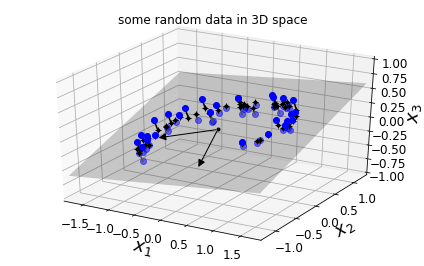

In [17]:
# Plot the 3D dataset, the plane and the projections on that plane.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.title("some random data in 3D space")

save_fig("dataset_3d_plot")
plt.show()

# notice that all training instances lies close to a 2D plane.
# drop projections of all points on this 2D plane to extract data in 2D format



Saving figure dataset_2d_plot


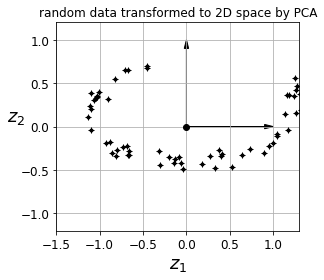

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
plt.title("random data transformed to 2D space by PCA")
save_fig("dataset_2d_plot")
plt.show()




In [19]:
# # Manifold learning
# Swiss roll:

# At times, simply projecting the data onto a lower dimensional plane may not lead to optimum results,
# as in case of a swiss roll.
# What we really want to do here is UNROLL the swiss roll to find lower dimensional representation.
# This is called learning the manifold.

from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)



Saving figure swiss_roll_plot


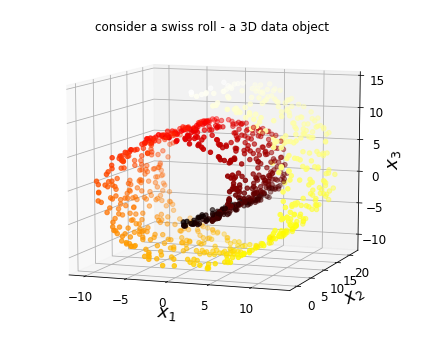

In [20]:
# make_swiss_role is a module which returns :-
# X : array of shape [n_samples, 3]
#       The points. (in 3D matrix format)
# t : array of shape [n_samples]
#       The univariate position of the sample according to the main dimension of the points 
# in the manifold.


axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.title("consider a swiss roll - a 3D data object")
save_fig("swiss_roll_plot")
plt.show()



Saving figure squished_swiss_roll_plot


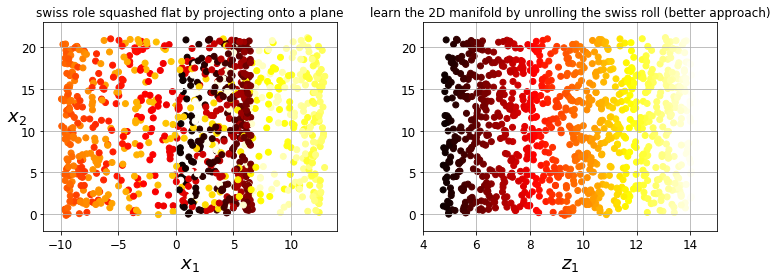

In [21]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.title("swiss role squashed flat by projecting onto a plane")

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)
plt.title("learn the 2D manifold by unrolling the swiss roll (better approach)")
save_fig("squished_swiss_roll_plot")
plt.show()



Saving figure manifold_decision_boundary_plot1


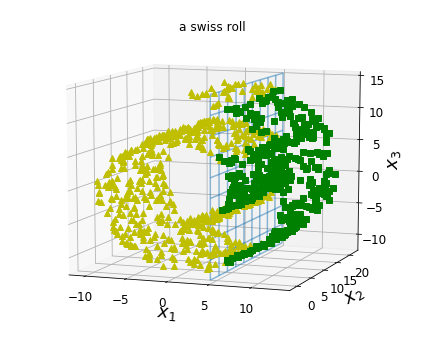

Saving figure manifold_decision_boundary_plot2


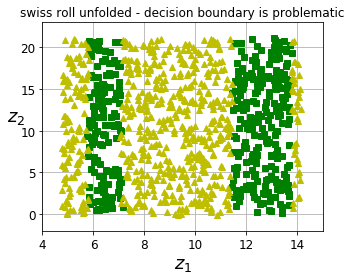

In [22]:
# the follow code shows that decision boundary is not always simpler with lower dimensions

from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.title("a swiss roll")
save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.title("swiss roll unfolded - decision boundary is problematic")
save_fig("manifold_decision_boundary_plot2")
plt.show()

# in above case, a clear decision boundary emerges.


Saving figure manifold_decision_boundary_plot3


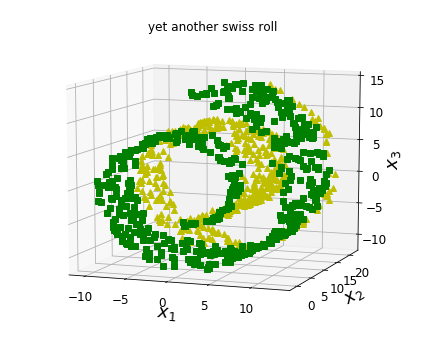

In [23]:
# let's try a different swiss roll below. Will a decision boundary emerge ?

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.title("yet another swiss roll")
save_fig("manifold_decision_boundary_plot3")
plt.show()



Saving figure manifold_decision_boundary_plot4


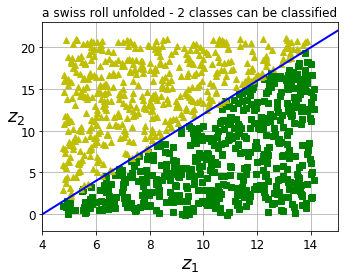

In [24]:
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.title("a swiss roll unfolded - 2 classes can be classified")
save_fig("manifold_decision_boundary_plot4")
plt.show()